<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2024-1</h1>

### Alumnos:
### Ángel Maximiliano Carrillo Rodríguez 
### Javier Rivas Moreno
### Sebastian Chiquete Bustamante

<h1 align="center">Programación para la física computacional</h1>

<h2> Profesor: Sergio A. Alcalá Corona </h2>

---
### Ayudantes:
#### Daniel Rojo Mata
#### Rodrigo Vega Vilchis
---

## Proyecto Final: Algoritmos de Clasificación


### Programación básica para la física

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils.validation import check_random_state

---

### Comparación de algoritmos de decisión

Comparación de diferentes algoritmos de clasifiación al momento de predecir lo faltante en la parte inferior de cada imágen, deduciedno que hay que conocer que tipo de problema se busca resolver para saber que algortimo sería el más optimo.

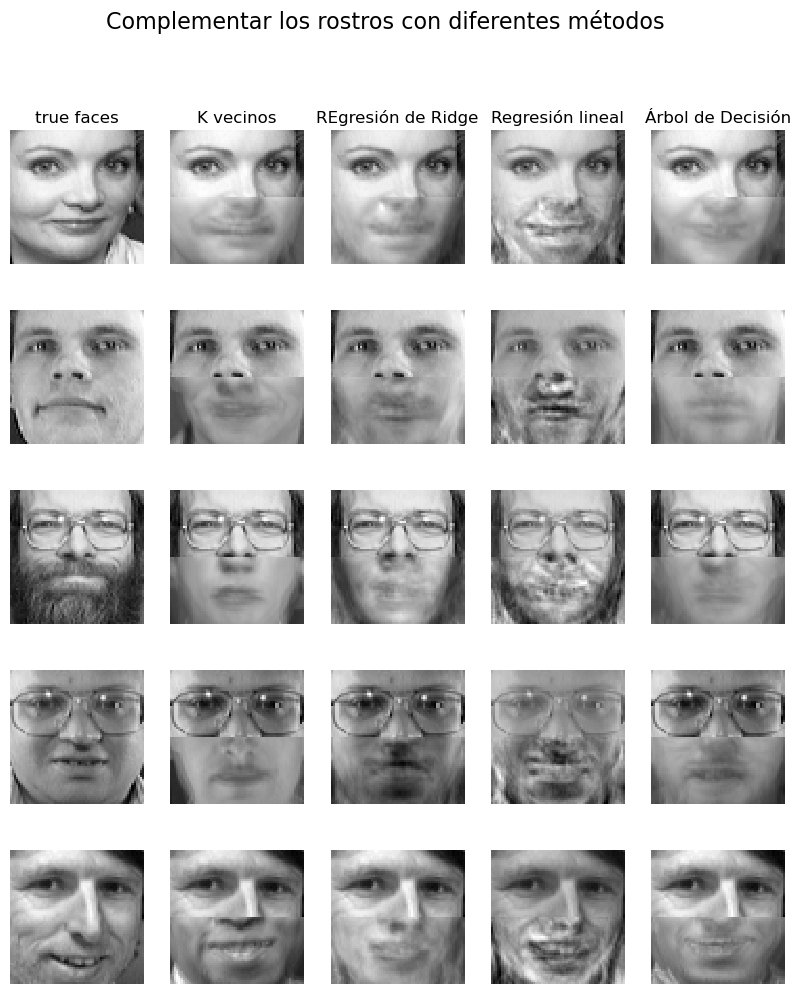

In [2]:
# Cargar las caras
data, targets = fetch_olivetti_faces(return_X_y=True)

train = data[targets < 30]
test = data[targets >= 30]  # Test en personas independientes

# Test en las personas buscadas
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Parte superior de la cara
X_train = train[:, : (n_pixels + 1) // 2]
# Parte inferior de la cara
y_train = train[:, n_pixels // 2 :]
X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]

# Estimación
ESTIMATORS = {
    "Árbol de Decisión": ExtraTreesRegressor(
        n_estimators=10, max_features=32, random_state=0
    ),
    "K vecinos": KNeighborsRegressor(),
    "Regresión lineal": LinearRegression(),
    "REgresión de Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Graficar las caras completas
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle("Complementar los rostros con diferentes métodos", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()

---

### Árbol de decisión con el conjunto de datos de Iris

Ejemplo simple de como se entrena un árbol de decisión, usando los datos de flores de Iris.

In [3]:
iris = load_iris()

C:\Users\Javier\AppData\Local\Temp\ipykernel_24988\585531365.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\Javier\AppData\Local\Temp\ipykernel_24988\585531365.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\Javier\AppData\Local\Temp\ipykernel_24988\585531365.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\Javier\AppData\Local\Temp\ipykernel_24988\585531365.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\Javier\AppData\Local\Temp\ipykernel_24988\585531365.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\Javier\AppData\Local\Temp\ipykernel_24988\585531365.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 

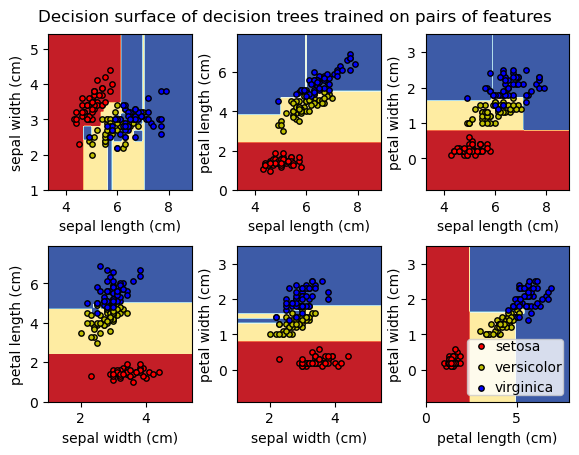

In [4]:
# Parametros
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # Solo consideramos dos variables
    X = iris.data[:, pair]
    y = iris.target

    # Entrenamiento
    clf = DecisionTreeClassifier().fit(X, y)

    # Grafica las decisiones
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Grafica los puntos del entrenamiento
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

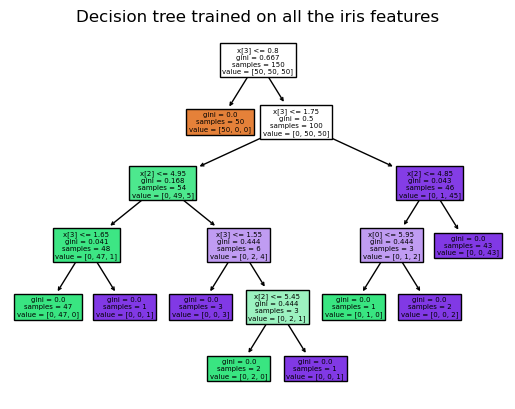

In [5]:
plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

---

### Árbol de decisión en la determinación de enfermedades

In [6]:
pacientes = pd.read_csv("C:/Users/Javier/Física Computacional/Proyecto/Pacientes2.csv",
engine = "python", index_col = 0)

In [7]:
pacientes.head()

,Enfermedad,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
NOEXPED,,,,,,,,,,,
1,NO,0,0,1,0,0,38,0,0,0,0
2,SI,0,1,1,1,1,49,1,0,0,0
3,SI,1,1,0,1,1,59,1,0,0,1
4,NO,1,1,0,0,0,44,0,0,0,0
5,NO,0,0,1,0,0,42,0,0,0,0


In [8]:
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985 entries, 1 to 909
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Enfermedad  985 non-null    object
 1   HIPERTEN    985 non-null    int64 
 2   HIPERGLU    985 non-null    int64 
 3   HDLBAJA     985 non-null    int64 
 4   HIPERTRI    985 non-null    int64 
 5   CINTALTA    985 non-null    int64 
 6   EDAD        985 non-null    int64 
 7   GENERO      985 non-null    int64 
 8   FUMA        985 non-null    int64 
 9   ALCOHOL     985 non-null    int64 
 10  POLIURIA    985 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 92.3+ KB


In [9]:
# Variables predictoras
X = pacientes.iloc[:,1:11]

# Variable a predecir
Y = pacientes.iloc[:,0]

X.head()
# Ya no tenemos la variable a predecir, si tiene enfermedad

,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
NOEXPED,,,,,,,,,,
1,0,0,1,0,0,38,0,0,0,0
2,0,1,1,1,1,49,1,0,0,0
3,1,1,0,1,1,59,1,0,0,1
4,1,1,0,0,0,44,0,0,0,0
5,0,0,1,0,0,42,0,0,0,0


In [10]:
# División de testing y training
# Normalmente el entrnamiento usa el 80% de datos y la prueba unos %20

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 0)

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 494 to 28
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   HIPERTEN  788 non-null    int64
 1   HIPERGLU  788 non-null    int64
 2   HDLBAJA   788 non-null    int64
 3   HIPERTRI  788 non-null    int64
 4   CINTALTA  788 non-null    int64
 5   EDAD      788 non-null    int64
 6   GENERO    788 non-null    int64
 7   FUMA      788 non-null    int64
 8   ALCOHOL   788 non-null    int64
 9   POLIURIA  788 non-null    int64
dtypes: int64(10)
memory usage: 67.7 KB


In [12]:

arbol = DecisionTreeClassifier(max_depth = 4) # Aquí fijamos los niveles del árbol
# Con parentesis vacio da todo el árbol

# Entrenamiento del modelo
arbol_enfermedad = arbol.fit(X_train, Y_train)

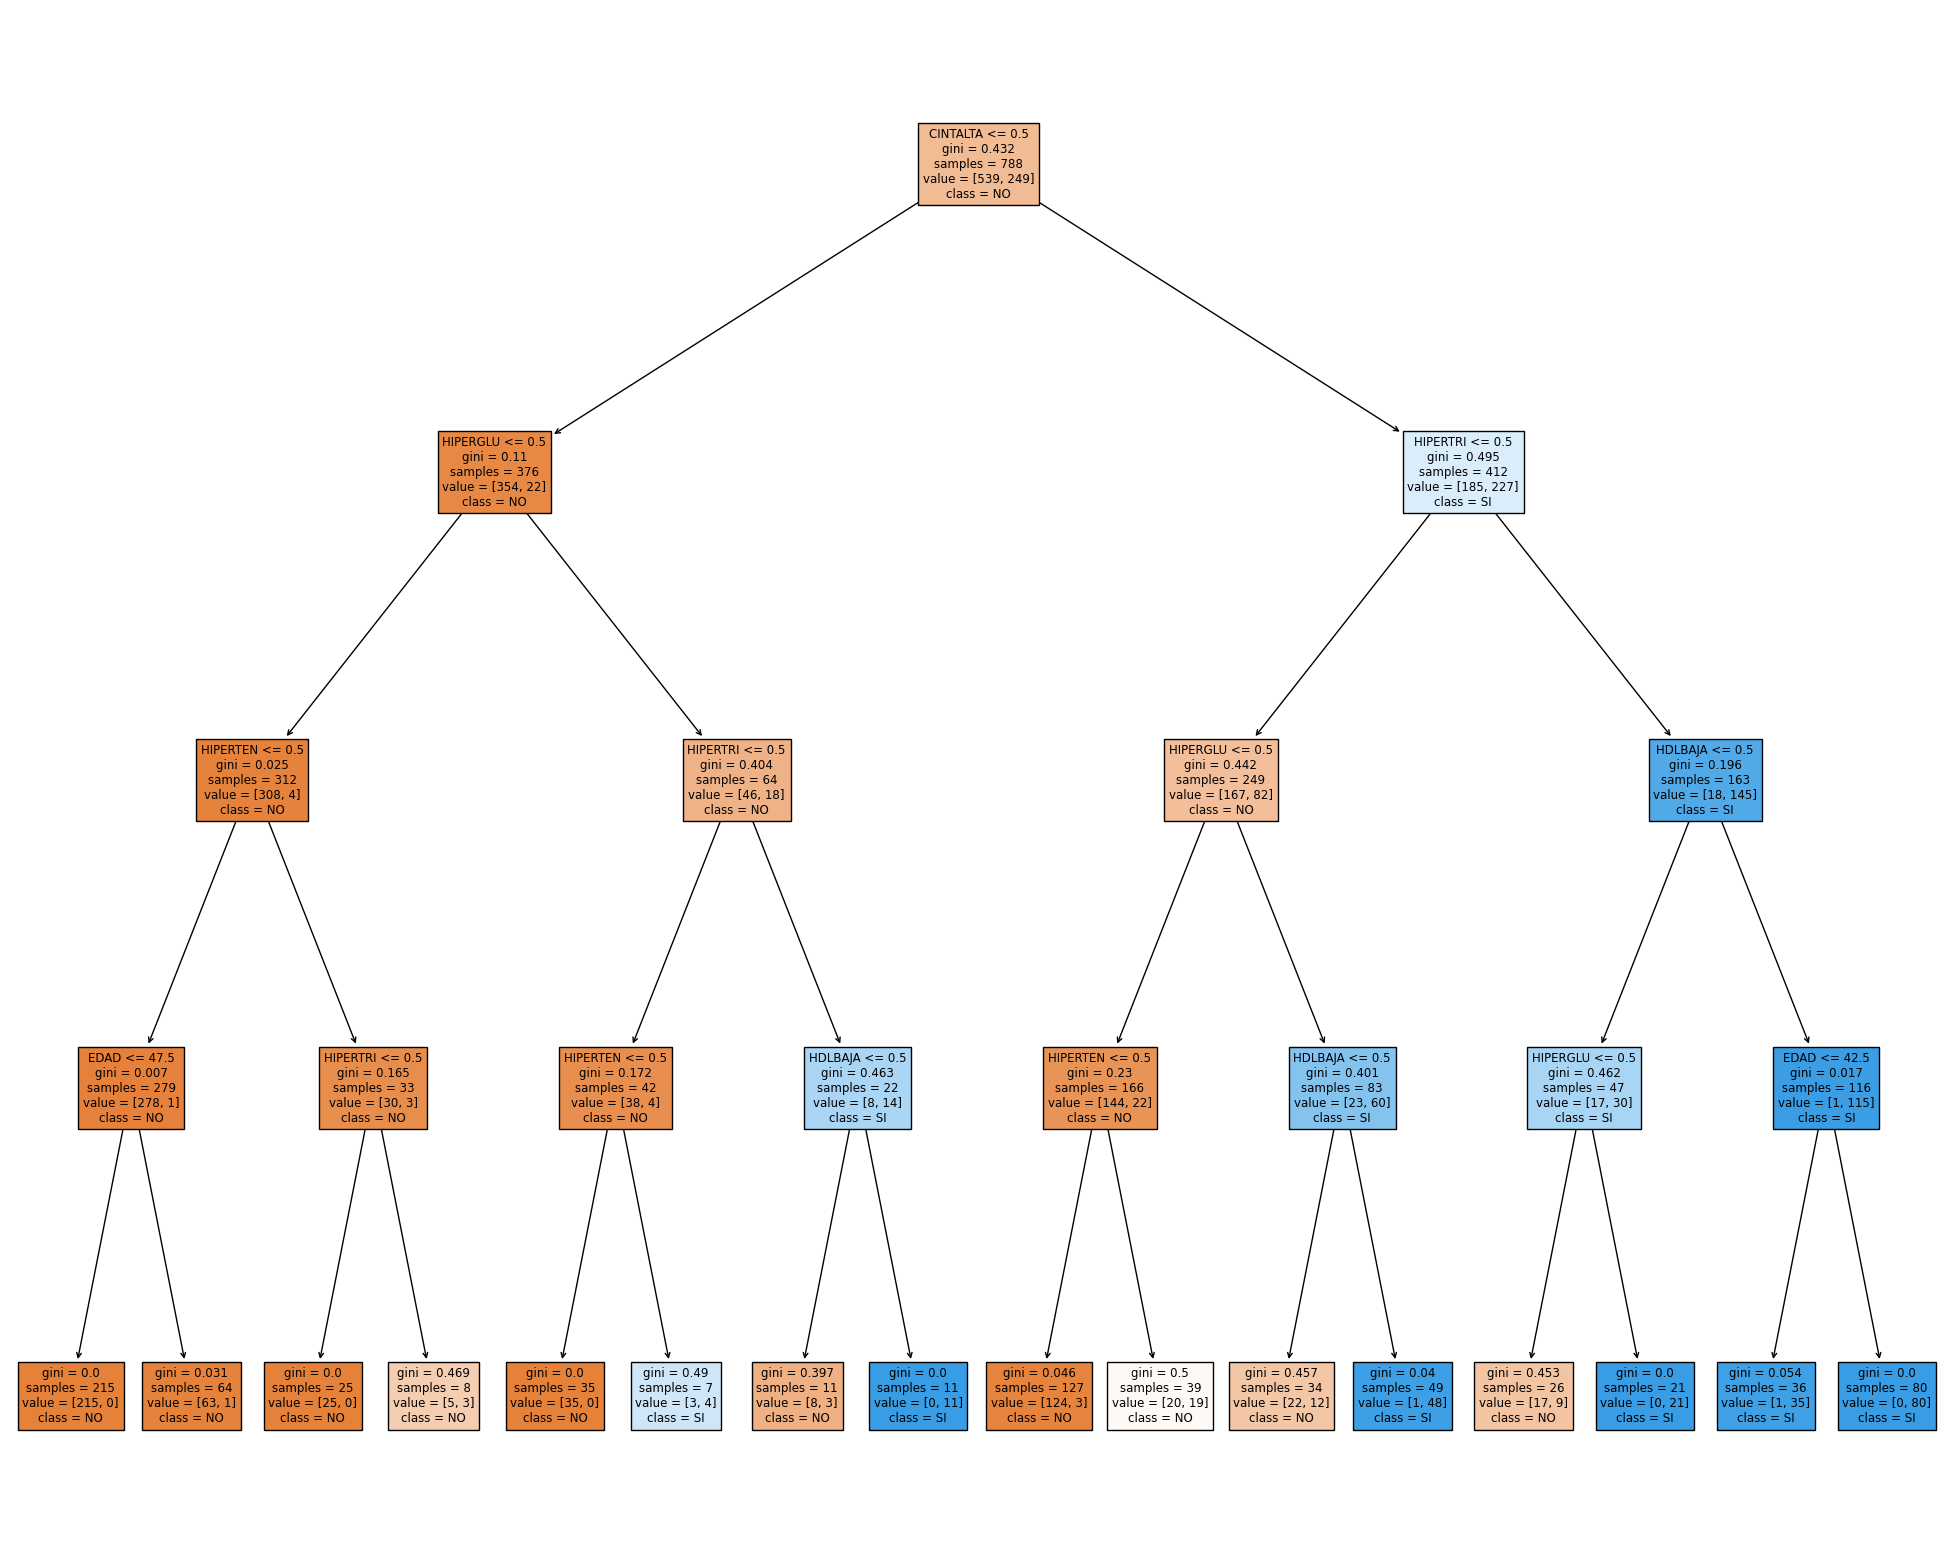

In [13]:

fig = plt.figure(figsize=(25,20))

plot_tree(arbol_enfermedad, feature_names = list(X.columns.values), class_names = list(Y.values), filled = True)
plt.show()

Lado izquierdo es verdadero dercho es falso

Ahora veamos que tan bueno es para predecir

In [14]:
Y_pred = arbol_enfermedad.predict(X_test)

# Muestra las etiquetas al hacer la predicción
Y_pred

array(['SI', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'SI', 'NO', 'SI', 'SI', 'SI', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO', 'SI', 'NO', 'NO',
       'SI', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'SI', 'SI', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI',
       'NO', 'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'NO', 'SI',
       'NO', 'NO', 'SI', 'NO', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'N

In [15]:

# Las filas contienen las cantidades de los valores reales clase no (arriba) y clase si (abajo)
# Las columnas muestran los valores predichos
Matriz_de_Confusion = confusion_matrix(Y_test, Y_pred) # Valores reales y valores de predicción

Matriz_de_Confusion
# La diagonal nos dice la cantidad cuyos valores fue correctamente predicho
# La diagonal contraria nos dice los erroneos

array([[146,   4],
       [  7,  40]], dtype=int64)

Calculamos la precisión global del modelo

In [16]:
Precision_Global = np.sum(Matriz_de_Confusion.diagonal())/np.sum(Matriz_de_Confusion)
Precision_Global

0.9441624365482234

Precisón por cada clase

In [17]:
Precision_No = ((Matriz_de_Confusion[0, 0]))/(sum(Matriz_de_Confusion[0,]))
Precision_No

0.9733333333333334

In [18]:
Precision_Si = ((Matriz_de_Confusion[1, 1]))/(sum(Matriz_de_Confusion[1,]))
Precision_Si

0.851063829787234